# Introduction

Time series modeling is a set of tools and techniques that model temporal or time series data and aim to predict or forecast future behavior of the data. It has applications in various fields such as finance, economics, weather forecasting, and more.

By analyzing historical data, we can identify different components in time series data such as trends, seasonality, and so on, and use these insights to make more informed business decisions.

In this demonstration, we will explore a few different techniques for time series modeling. As we construct and evaluate our models, we'll gain insight into how different techniques can be used to handle common challenges in time series modeling.


## Problem Statement
In  this demonstration, we will apply time series modeling techniques to a real-world problem that involves a company and its sales. The company has historical sales data that it has captured over a period of time and wishes to forecast future sales trends so that it may optimize its inventory management processes.

The problem statement for this demonstration can be summarized as follows:
> Given historical sales data of a company, forecast its future sales.

By studying the forecast, the company can effectively plan and prepare their inventory to ensure that the right amount of stock is made ready over future months.

## Data Description
You have been provided with a data set containing daily sales and profit data of the company for the period 2011 to 2014. The data set has the following three attributes:

<table>
  <tr>
    <th> Attributes </th>
    <th> Description <th>
  </tr>
  <tr>
    <td> Order-Date </td>
    <td> The date on which the order was placed (in dd-mm-yyyy format) </td>
  </tr>
  <tr>
    <td> Sales </td>
    <td> Total sales value of the transaction (in dollars) </td>
  </tr>
  <tr>
    <td> Profit </td>
    <td> Profit made on the transaction (in dollars) </td>
  </tr>

</table>

## Outline
In this demonstration, we will:
- Prepare the data for time series modeling
- Forecast sales using the following models:
  - Autoregressive (AR)
  - Autoregressive integrated moving average (ARIMA)
  - Seasonal autoregressive integrated moving average (SARIMA)

We will analyze the performance of these models using root mean squared error (RMSE) and mean absolute percentage error (MAPE).

Please note that while we could evaluate the performance of the forecasting models using any one of RMSE or MAPE, to obtain a more comprehensive assessment of their performance, we will use both measures for each model.

# Part 1 - Setup and Data Preparation
In this section, we will:
- Import necessary packages for executing the code
- Load the data
- Prepare the data for further analysis

In [22]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import and execute method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

Let's begin by loading the data and building familiarity with it.

In [23]:
df=pd.read_csv('C:/Users/abhay/csv/Superstore_Data.csv')

In [24]:
df.head()

,Order Date,Sales,Profit
0,17-10-2013,5175.171,919.971
1,07-11-2011,1822.080,564.840
2,14-04-2012,5244.840,996.480
3,06-06-2013,3701.520,1036.080
4,25-02-2012,1878.720,582.360


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  5699 non-null   object 
 1   Sales       5699 non-null   float64
 2   Profit      5699 non-null   float64
dtypes: float64(2), object(1)
memory usage: 133.7+ KB


In [26]:
df["Order Date"]=pd.to_datetime(df["Order Date"])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  5699 non-null   datetime64[ns]
 1   Sales       5699 non-null   float64       
 2   Profit      5699 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 133.7 KB


As you can see, the data type of the *Order Date* column is *object*. But to further conduct analyses on the data, such as grouping by month or year, we have to convert the data type of the *Order Date* column to *datetime*.

Let's make sure that the data points in the data frame are ordered by date.

In [28]:
df.head()#by default formate : yyyy-mm-dd

,Order Date,Sales,Profit
0,2013-10-17,5175.171,919.971
1,2011-11-07,1822.080,564.840
2,2012-04-14,5244.840,996.480
3,2013-06-06,3701.520,1036.080
4,2012-02-25,1878.720,582.360


In [29]:
df.sort_values("Order Date",inplace=True)

In [30]:
df.tail()

,Order Date,Sales,Profit
4875,2014-12-30,8.5407,2.3607
1455,2014-12-30,255.2850,-47.6550
4345,2014-12-30,10.8540,-6.6960
1804,2014-12-31,300.2400,84.0600
3956,2014-12-31,39.6000,6.6600


Next, we will set the updated *Order Date* feature as the index of the data frame.

In [31]:
df.reset_index()

,index,Order Date,Sales,Profit
0,5073,2011-01-01,55.2420,15.3420
1,3056,2011-01-01,120.3660,36.0360
2,4083,2011-01-01,113.6700,37.7700
3,424,2011-01-03,912.4560,-319.4640
4,5517,2011-01-03,6.0060,0.5460
...,...,...,...,...
5694,4875,2014-12-30,8.5407,2.3607
5695,1455,2014-12-30,255.2850,-47.6550
5696,4345,2014-12-30,10.8540,-6.6960
5697,1804,2014-12-31,300.2400,84.0600


In [32]:
df.head()

,Order Date,Sales,Profit
5073,2011-01-01,55.242,15.342
3056,2011-01-01,120.366,36.036
4083,2011-01-01,113.670,37.770
424,2011-01-03,912.456,-319.464
5517,2011-01-03,6.006,0.546


In [33]:
df.reset_index(inplace=True,drop=True)#drop=True delete the old index

In [34]:
df.head()

,Order Date,Sales,Profit
0,2011-01-01,55.242,15.342
1,2011-01-01,120.366,36.036
2,2011-01-01,113.670,37.770
3,2011-01-03,912.456,-319.464
4,2011-01-03,6.006,0.546


In [35]:
df.set_index('Order Date',inplace=True)

In [36]:
df.head()

,Sales,Profit
Order Date,,
2011-01-01,55.242,15.342
2011-01-01,120.366,36.036
2011-01-01,113.670,37.770
2011-01-03,912.456,-319.464
2011-01-03,6.006,0.546


To study monthly sales, we need to group the rows of *df* by month and sum up the values in each group. We will use the *Grouper* function in conjunction with the *groupby* operation for grouping. *Grouper* is a function in the *pandas* library that allow us to group time series data based on a specific frequency (*freq*) which in our case is monthly (*M*).

In [37]:
# df['2011-01-01']#Not work
# df.loc["2011-01-01":'2011-01-03']
df.loc["2011-01-01"]
# when we change the index of the data , then to select the rows using  new index we should this method 
# df.loc['new_idex']

,Sales,Profit
Order Date,,
2011-01-01,55.242,15.342
2011-01-01,120.366,36.036
2011-01-01,113.670,37.770


In [38]:
df=df.groupby(pd.Grouper(freq="M")).sum()#Last Date of every month
# pd.Grouper is a class in the pandas library that allows for flexible grouping operations, especially with time series data
# It is used in conjunction with the . groupby() method to specify how the data should be grouped
df.head()

,Sales,Profit
Order Date,,
2011-01-31,15711.7125,991.2825
2011-02-28,12910.8588,1338.8688
2011-03-31,19472.5632,3747.1632
2011-04-30,15440.3046,3846.4746
2011-05-31,24348.9723,3639.9423


You can see that only one date from each month is used in the index as representative of each of those months.

Recall from the problem statement that we are interested in forecasting *Sales*. So, we can drop the *Profit* feature from our data set.

In [39]:
df.shape

(48, 2)

In [40]:
df.drop(columns='Profit',inplace=True)

In [41]:
df.shape

(48, 1)

In [42]:
df[:4]

,Sales
Order Date,
2011-01-31,15711.7125
2011-02-28,12910.8588
2011-03-31,19472.5632
2011-04-30,15440.3046


Let's now plot our data set to visualize our time series and try to identify patterns in it.

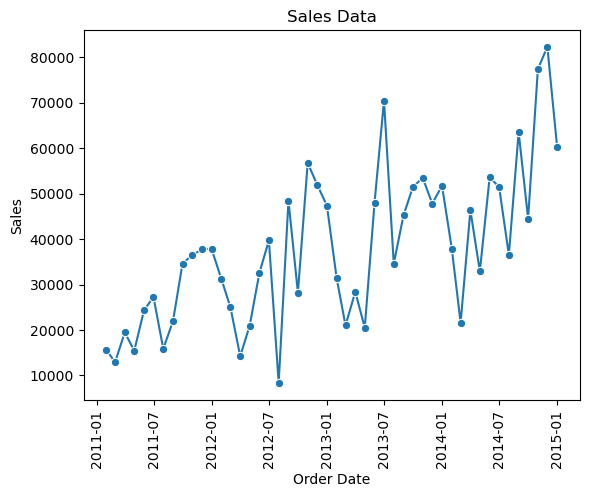

In [43]:
#plot the time series data
sns.lineplot(x='Order Date',y='Sales',data=df,marker='o')#remember one thing always use libe plot while working with time series data 
# ex:stock price,flight bookings
plt.xticks(rotation=90)
plt.title('Sales Data')
plt.show()

# Part 2 - Stationarity Analysis
In this part of the demonstration, we will perform tests on the time series data to understand whether it is stationary or not. The autoregressive modeling requires the time series data to be stationary. To test this, we will use the following test:
- Augmented Dickey–Fuller (ADF) test

### ADF Test

In [44]:
from statsmodels.tsa.stattools import adfuller#adfuller is hyphothies test

Note that the null hypothesis for the ADF test is *The time series is not stationary*.

In [45]:
# Use the ADF test to check for the stationarity of the 'Sales' variable
adf_test_result=adfuller(df["Sales"])
adf_test_result[1]

0.1987628396941694

If the $p$-value is < $0.05$, then our data is stationary otherwise our data is non-stationary

We have analyzed our time series data. Let's now split the data into training and testing sets so that we're ready to build and evaluate time series models on the data.

In [46]:
# Split the data into training and testing data sets
df_train=df[:42]#first 42 months for training purpose
df_test=df[42:]#last 6 months for testing purpose

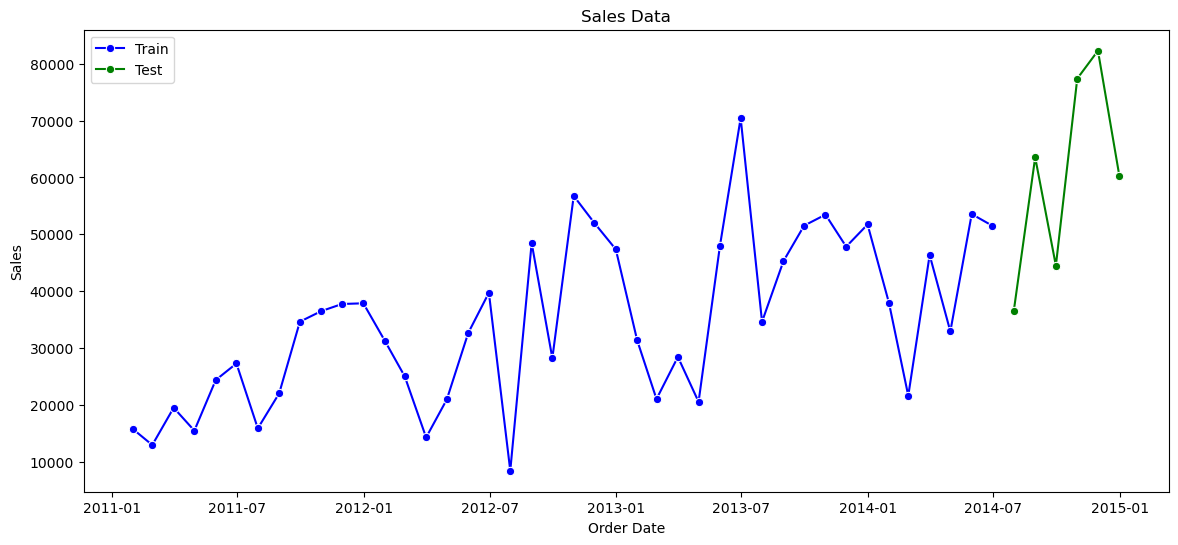

In [47]:
# Plot the time series data with the train-test split
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
plt.title('Sales Data');

# Part 3 - Time Series Transformations
Now we will transform the time series data so that it ends up having a more stationary mean and variance. To do this, we will use the following data transformations:
- Box-Cox transformation
- Differencing

Box-Cox transformation is used to make the variance of a time series stationary and differencing is used to make its mean stationary. Note that although these methods can be executed in any order, differencing is done after Box-Cox transformation in general.

### Subpart 1 - Box-Cox Transformation

The Box-Cox transformation is used to stabilize the variance of a time series. It involves the application of a power transformation to the time series data. Let's import the *boxcox* method from *scipy* to implement this transformation.

In [48]:
# Import the 'boxcox' method from 'scipy' to implement the Box-Cox transformation
from scipy.stats import boxcox

Note that from here on out, we will only perform data transformations on the training data to avoid data leakage.

In [49]:
# Use the 'boxcox' method to transform the 'Sales' variable
df_boxcox=pd.Series(boxcox(df_train["Sales"],lmbda=0),index=df_train.index)#lmbda zero means you are doing log transformation beacuse log transformation 
# is what we need now
df_boxcox

Order Date
2011-01-31     9.662162
2011-02-28     9.465824
2011-03-31     9.876762
2011-04-30     9.644737
2011-05-31    10.100245
2011-06-30    10.213176
2011-07-31     9.670472
2011-08-31     9.999354
2011-09-30    10.451990
2011-10-31    10.504301
2011-11-30    10.538015
2011-12-31    10.541307
2012-01-31    10.350762
2012-02-29    10.126058
2012-03-31     9.563893
2012-04-30     9.948770
2012-05-31    10.392332
2012-06-30    10.589359
2012-07-31     9.034764
2012-08-31    10.788180
2012-09-30    10.246837
2012-10-31    10.946289
2012-11-30    10.858364
2012-12-31    10.765187
2013-01-31    10.352276
2013-02-28     9.952265
2013-03-31    10.254659
2013-04-30     9.928605
2013-05-31    10.778531
2013-06-30    11.162471
2013-07-31    10.451517
2013-08-31    10.719994
2013-09-30    10.849594
2013-10-31    10.886475
2013-11-30    10.775048
2013-12-31    10.853554
2014-01-31    10.543348
2014-02-28     9.979731
2014-03-31    10.743763
2014-04-30    10.401152
2014-05-31    10.888275
2014-

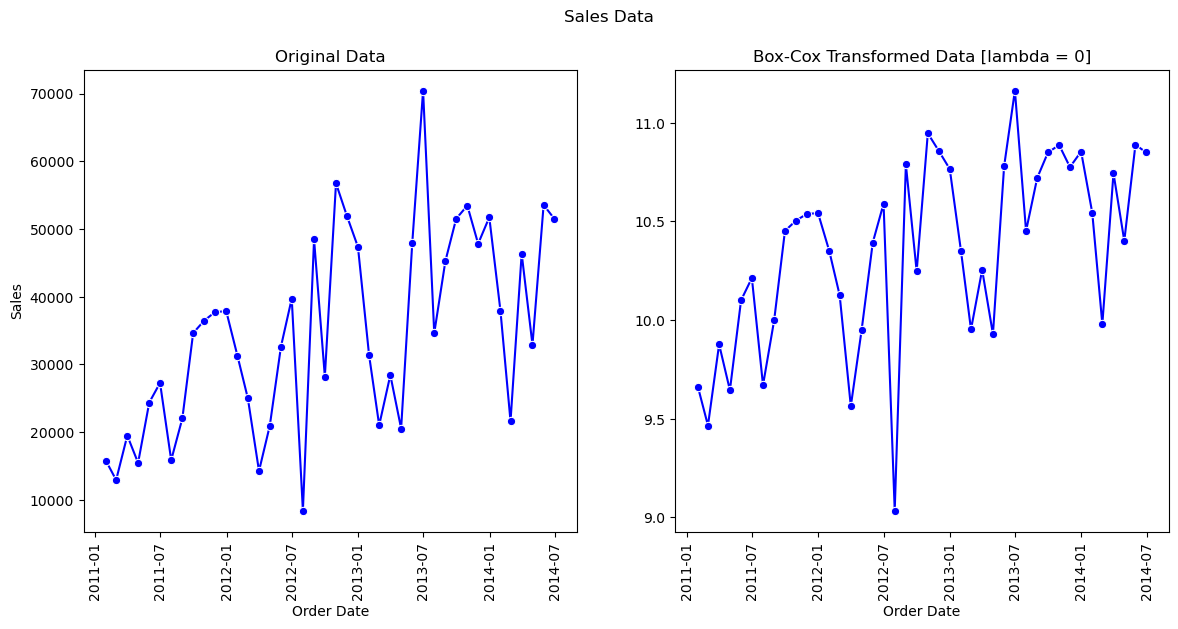

In [50]:
# Plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox.index, y = df_boxcox.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Box-Cox Transformed Data [lambda = 0]')

plt.suptitle('Sales Data');

### Subpart 2 - Differencing

Differencing is used to stabilize the mean of a time series. It involves taking the difference of consecutive data points in the time series. If this process is executed once, it is known as first-order differencing. If done twice, it is called second-order differencing. And so on.

In [51]:
# Obtain the first-order differenced version of the time series data
df_differenced=df["Sales"]-df["Sales"].shift()#Next - previous value , first value is Null
df_differenced.head()

Order Date
2011-01-31          NaN
2011-02-28   -2800.8537
2011-03-31    6561.7044
2011-04-30   -4032.2586
2011-05-31    8908.6677
Freq: M, Name: Sales, dtype: float64

Note that differencing results in a missing value at the beginning of the series, but this is not of much consequence for the analysis.

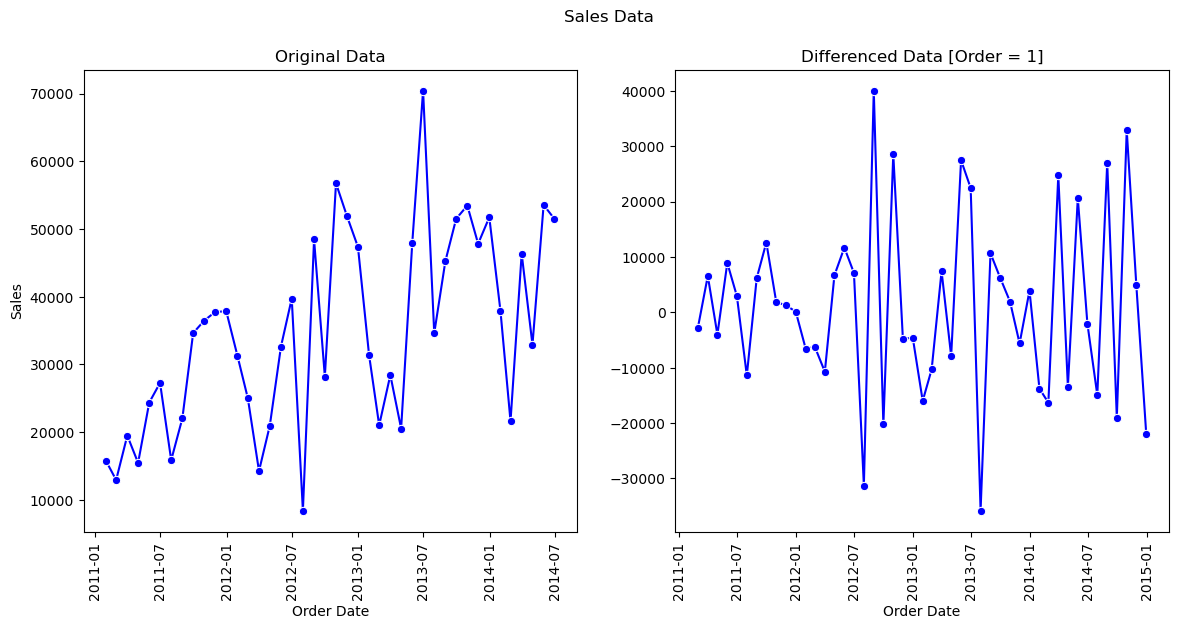

In [52]:
# Plot the original time series data and its first-order differenced version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_differenced.index, y = df_differenced.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Differenced Data [Order = 1]')

plt.suptitle('Sales Data');

We will continue with difference order $=1$ for the remainder of the demonstration. However, you are free to analyze the impact of other order values on the mean of the time series data.

### Subpart 3 - Transformed Time Series Data

We will now apply the Box-Cox and the differencing transformations on the training data so that the data is ready for autoregressive time series modeling.

In [53]:
# Apply the Box-Cox and differencing transformations on the training data
df_boxcox=pd.Series(boxcox(df_train["Sales"],lmbda=0),index=df_train.index)
df_boxcox_diff=df_boxcox-df_boxcox.shift()
df_boxcox_diff

Order Date
2011-01-31         NaN
2011-02-28   -0.196338
2011-03-31    0.410938
2011-04-30   -0.232025
2011-05-31    0.455508
2011-06-30    0.112932
2011-07-31   -0.542704
2011-08-31    0.328881
2011-09-30    0.452636
2011-10-31    0.052311
2011-11-30    0.033713
2011-12-31    0.003292
2012-01-31   -0.190545
2012-02-29   -0.224703
2012-03-31   -0.562166
2012-04-30    0.384877
2012-05-31    0.443562
2012-06-30    0.197027
2012-07-31   -1.554595
2012-08-31    1.753416
2012-09-30   -0.541343
2012-10-31    0.699452
2012-11-30   -0.087925
2012-12-31   -0.093177
2013-01-31   -0.412912
2013-02-28   -0.400011
2013-03-31    0.302394
2013-04-30   -0.326054
2013-05-31    0.849926
2013-06-30    0.383940
2013-07-31   -0.710954
2013-08-31    0.268477
2013-09-30    0.129600
2013-10-31    0.036881
2013-11-30   -0.111427
2013-12-31    0.078506
2014-01-31   -0.310206
2014-02-28   -0.563617
2014-03-31    0.764032
2014-04-30   -0.342611
2014-05-31    0.487122
2014-06-30   -0.039254
Freq: M, dtype: float64

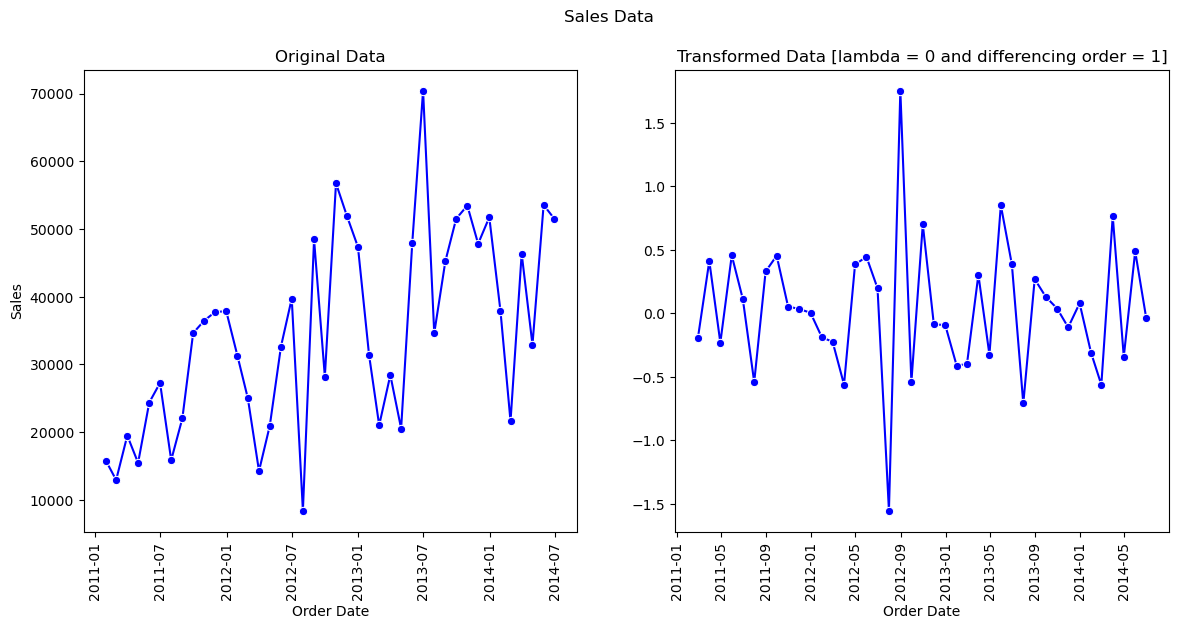

In [54]:
# Plot the original time series data and its transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox_diff.index, y = df_boxcox_diff.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Transformed Data [lambda = 0 and differencing order = 1]')

plt.suptitle('Sales Data');

In [55]:
adfuller(df_boxcox_diff[1:])#here real number is 0.000007452211737752672

(-5.235081428404382,
 7.452211737752672e-06,
 10,
 30,
 {'1%': -3.6699197407407405,
  '5%': -2.9640707407407407,
  '10%': -2.621171111111111},
 42.285424420305894)

# Part 4 - Autocorrelation Plots
In this part of the demonstration, we will compute and visualize the autocorrelation function (ACF) and the partial autocorrelation function (PACF) plots for the time series data.

### Subpart 1 - Autocorrelation Function (ACF) Plot

The autocorrelation function (ACF) plot shows the autocorrelation values of a time series for different lag orders. Let's import the *plot_acf* method from *statsmodels* to implement this.

In [56]:
# Import 'plot_acf' from 'statsmodels' to compute and visualize the autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_acf

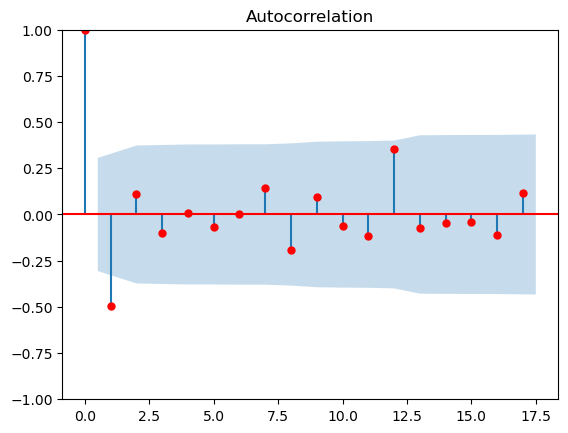

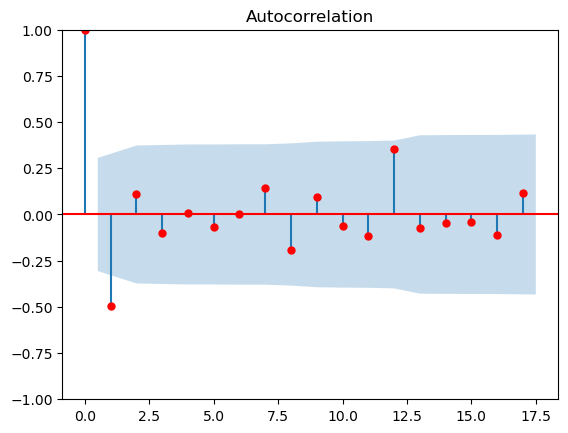

In [57]:
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_acf(x=df_boxcox_diff[1:],color="red")

We can see a strong autocorrelation value at lag order $=1$. There is other lag order value where it is strong as well, such as $12$, but $1$ is the strongest.

### Subpart 2 - Partial Autocorrelation Function (PACF) Plot

The partial autocorrelation fucntion (PACF) plot shows the partial autocorrelation values of a time series for different lag orders. Partial autocorrelation is computed such that it ignores short-term correlations in the data. Let's import the *plot_pacf* method from *statsmodels* to implement this.

In [58]:
# Import 'plot_pacf' from 'statsmodels' to compute and visualize the partial autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_pacf

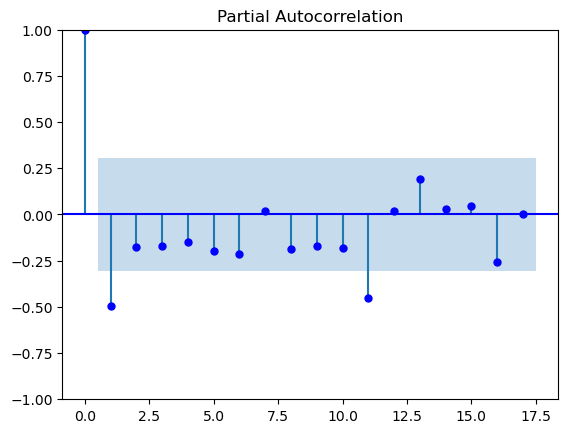

In [59]:
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_pacf(x=df_boxcox_diff[1:],color="blue");#if you put semicolon it shows graph only once

# Part 5 - Autoregressive Models
In this part of the demonstration, we will fit autoregressive models to the data and anaylze their performance using RMSE and MAPE values. We will build the following models:
- Autoregressive (AR)
- Autoregressive integrated moving average (ARIMA)
- Seasonal autoregressive integrated moving average (SARIMA)

### Subpart 1 - Autoregressive (AR) Method

We will begin by fitting a basic autoregressive model to the training data and analyze its performance. We will use the *ARIMA* method from *statsmodels* to build the model.

**Note:** The *ARIMA* method can also be used to implement other autoregressive models.

Let's import the *ARIMA* method from *statsmodels*.

In [60]:
# Import 'ARIMA' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.arima.model import ARIMA

In [61]:
# Fit an AR model to the transformed training data with lag order 1 and view its optimal parameter values
# Note: You may try other suitable lag order values as well
ar_model=ARIMA(df_boxcox_diff,order=(11,0,0))#in AR model only mention the P value don't mention D and Q , in AR model there is no concept D and Q
ar_model=ar_model.fit()#here we can use(1,0,0) but we are not getting the best result

In [62]:
# Obtain predictions from the AR model for the testing data indices
train_len=42
ar_model_preds=ar_model.predict(start=train_len,end=len(df)-1)

In [63]:
# Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds=pd.concat([df_boxcox_diff,ar_model_preds])

In [64]:
# Reverse the differencing transformation that was done on the data
df_boxcox_preds=df_boxcox_diff_preds.cumsum()
df_boxcox_preds=df_boxcox_preds.add(df_boxcox[0])

In [65]:
# Reverse the Box-Cox transformation that was done on the data
df_preds=np.exp(df_boxcox_preds)

Let's visualize the predictions along with the data before computing error measures.

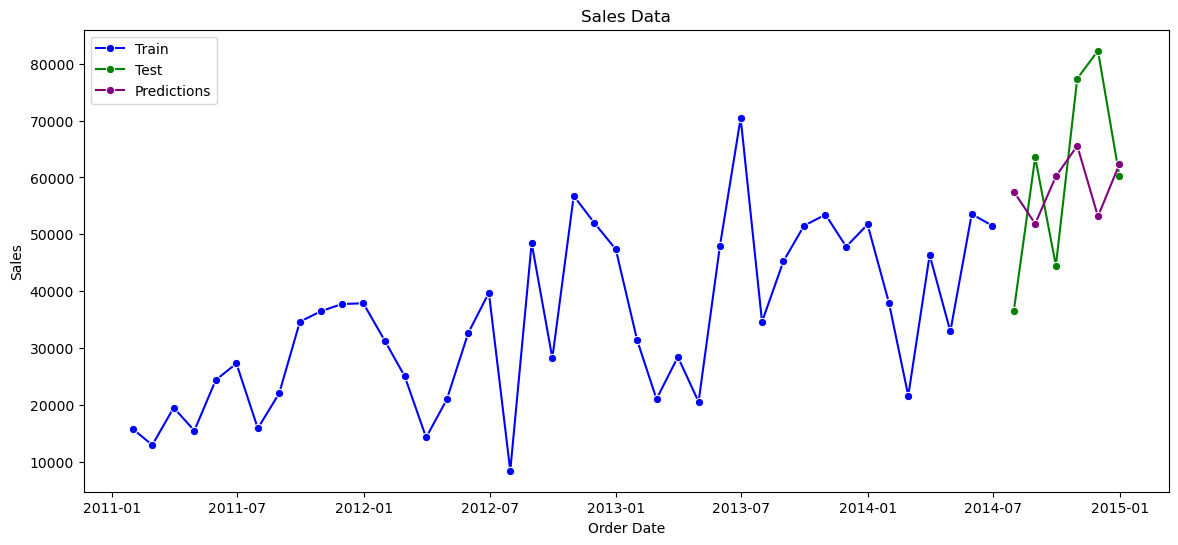

In [66]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model. But to do that, we will first import the *mean_squared_error* function from *sklearn*.

In [67]:
# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

In [68]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:]))

rmse = np.round(rmse, 2)

performance_df = pd.DataFrame(index = [0],data = {'Model': 'AR', 'RMSE': rmse})

performance_df.set_index('Model', inplace = True)

performance_df

,RMSE
Model,
AR,17401.41


### Autoregressive Integrated Moving Average (ARIMA) Method

We will now a fit an autoregressive integrated moving average model to the training data and analyze its performance. We will use the *ARIMA* method from *statsmodels* to build the model.

**Note:** The *ARIMA* method can also be used to implement other autoregressive models.

The parameter of interest in the *ARIMA* method is the *order* parameter. It is a 3-tuple of the form $(p, d, q)$ with the default value as $(0, 0, 0)$.

For the ARIMA method, we will specify all the values in this tuple. The first and the third values are the $p$ and $q$ values or the lag orders obtained from the PACF and the ACF plots respectively. The second value in the tuple is $d$ or the differencing order which we shall set as $1$.

In [69]:
# Fit an ARIMA model to the transformed training data with 'p = 11', 'd = 1' and 'q = 1' and view its optimal parameter values
# Note: Since differencing is integrated into the ARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'


In [70]:
# Obtain predictions from the ARIMA model for the testing data indices


In [71]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation


In [72]:
# Reverse the Box-Cox transformation that was done on the data


Let's visualize the predictions along with the data before computing error measures.

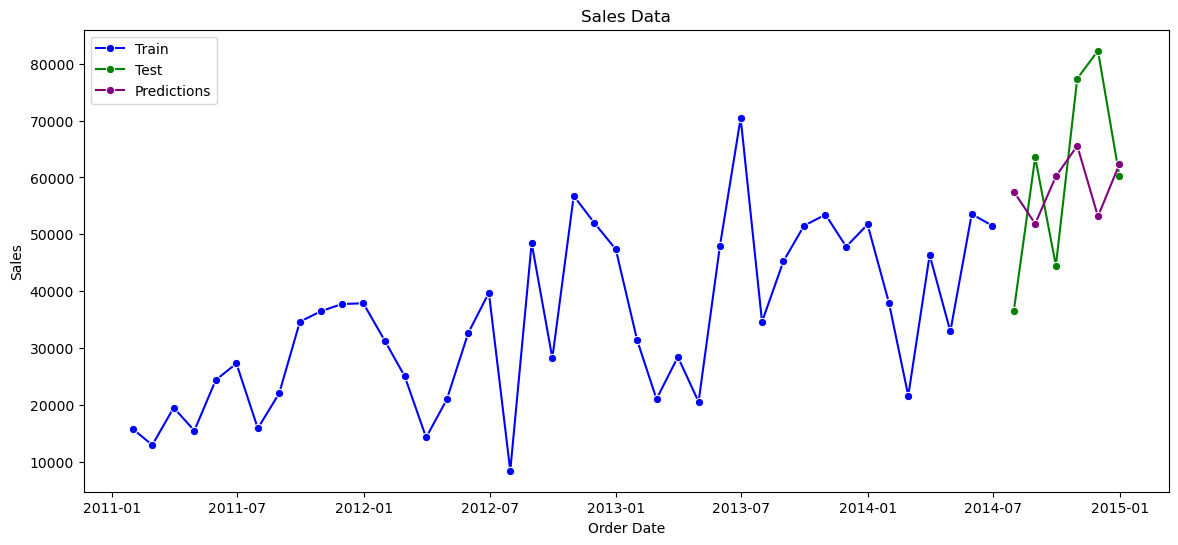

In [73]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model.

In [74]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:]))

rmse = np.round(rmse, 2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

performance_df_temp.set_index('Model', inplace = True)

performance_df = pd.concat([performance_df, performance_df_temp])

performance_df

,RMSE
Model,
AR,17401.41
ARIMA,17401.41


### Subpart 5 - Seasonal Autoregressive Integrated Moving Average (SARIMA) Method

We will now a fit a seasonal autoregressive integrated moving average model to the training data and analyze its performance. We will use the *SARIMAX* method from *statsmodels* to build the model.

Let's import the *SARIMAX* method from *statsmodels*.

In [75]:
# Import 'SARIMAX' from 'statsmodels' for building autoregressive models


The parameters of interest in the *SARIMAX* method are the *order* and the *seasonal_order* parameters. The *order* parameter is a 3-tuple of the form $(p, d, q)$ with the default value as $(0, 0, 0)$ and the *seasonal_order* parameter is a 4-tuple of the form $(P, D, Q, m)$ with the default value as $(0, 0, 0, 0)$.

For the SARIMA method, we will specify all the values in the two tuples.

The *seasonal_order* parameter specifies the lag and difference orders for the seasonal component of the model, along with its period.

In [76]:
# Note: We know that the seasonality period in the data is 'm = 12'
# Note: Since differencing is integrated into the SARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'


In [77]:
# Obtain predictions from the SARIMA model for the testing data indices


In [78]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation


In [79]:
# Reverse the Box-Cox transformation that was done on the data


Let's visualize the predictions along with the data before computing error measures.

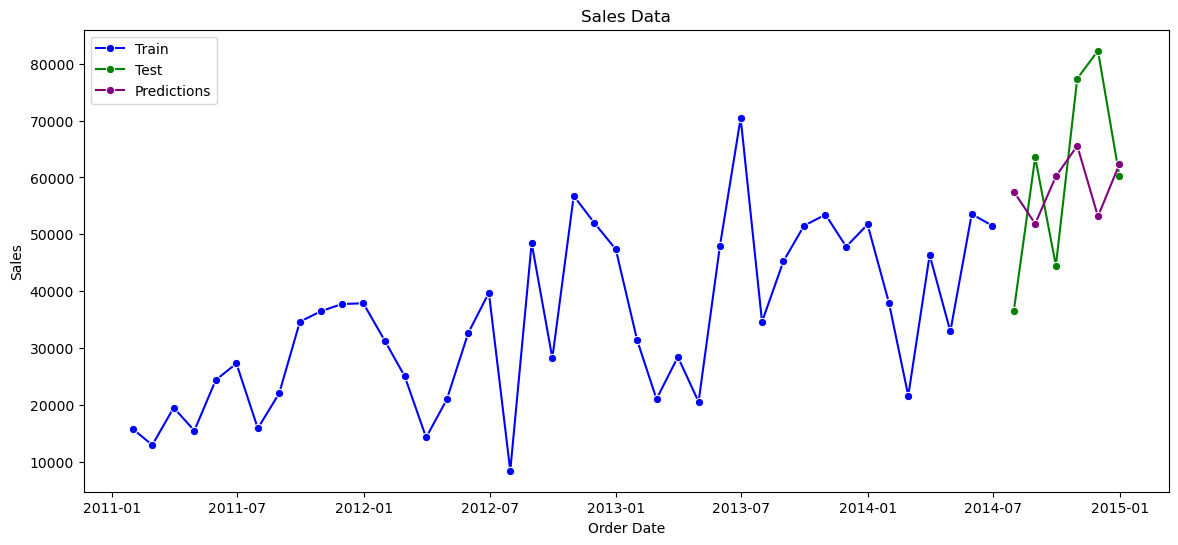

In [80]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model.

In [81]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:]))

rmse = np.round(rmse, 2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'SARIMA', 'RMSE': rmse})

performance_df_temp.set_index('Model', inplace = True)

performance_df = pd.concat([performance_df, performance_df_temp])

performance_df

,RMSE
Model,
AR,17401.41
ARIMA,17401.41
SARIMA,17401.41
